In [1]:
import torch
from vast.DistributionModels import weibull
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
training_data = torch.rand(1,100)
testing_data = torch.arange(-5,10,0.01)[:,None]

In [3]:
tailsize = 20

### FitHigh v/s FitHighFlipped v/s FitLow

In [4]:
mr = weibull.weibull()
mr.FitHigh(training_data, tailsize)
FitHigh = mr.wscore(testing_data)
FitHigh_prob = mr.prob(testing_data)

In [5]:
mr = weibull.weibull()
mr.FitHighFlipped(training_data, tailsize)
FitHighFlipped = mr.wscore(testing_data)
FitHighFlipped_prob = mr.prob(testing_data)

In [6]:
mr = weibull.weibull()
mr.FitLow(training_data, tailsize)
FitLow = mr.wscore(testing_data)
FitLow_prob = mr.prob(testing_data)

In [7]:
mr = weibull.weibull()
mr.FitLowReversed(training_data, tailsize)
FitLowReversed = mr.wscore(testing_data)
FitLowReversed_prob = mr.prob(testing_data)

### WScore

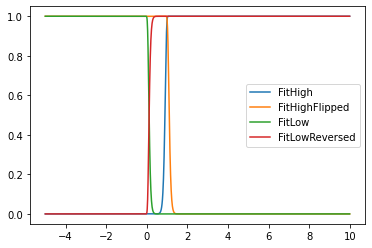

In [8]:
plt.plot(testing_data, FitHigh, label='FitHigh')
plt.plot(testing_data, FitHighFlipped, label='FitHighFlipped')
plt.plot(testing_data, FitLow, label='FitLow')
plt.plot(testing_data, FitLowReversed, label='FitLowReversed')
plt.legend()
plt.show()

### Probabilities

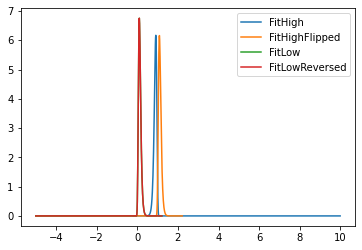

In [9]:
plt.plot(testing_data, FitHigh_prob, label='FitHigh')
plt.plot(testing_data, FitHighFlipped_prob, label='FitHighFlipped')
plt.plot(testing_data, FitLow_prob, label='FitLow')
plt.plot(testing_data, FitLowReversed_prob, label='FitLowReversed')
plt.legend()
plt.show()

### Effect of translate amount tensor on FitHigh

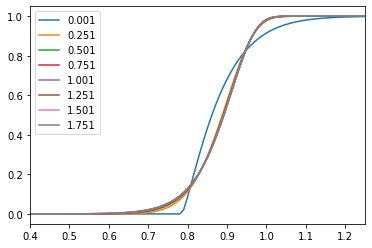

In [10]:
for i in torch.arange(0.001, 2, 0.25):
    mr = weibull.weibull(translateAmount=i)
    mr.FitHigh(training_data, tailsize)
    FitHigh = mr.wscore(testing_data)
    plt.plot(testing_data, FitHigh, label=f'{i:.3f}')
plt.xlim([0.4, 1.25])
plt.legend()
plt.show()